# Données écoquartiers / écovillages

## Données récoltées sur SCOPUS

In [65]:
# Charger les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("./ecoV&D.csv")
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Schianetz K., Kavanagh L.",18438209700;18437274800;,Sustainability indicators for tourism destinat...,2008,Journal of Sustainable Tourism,16,6,NaN,601,628,...,NaN,NaN,NaN,English,J. Sustainable Tour.,Article,Final,NaN,Scopus,2-s2.0-57349130590
1,Lietaert M.,29068041900;,Cohousing's relevance to degrowth theories,2010,Journal of Cleaner Production,18,6,NaN,576,580,...,NaN,JCROE,NaN,English,J. Clean. Prod.,Article,Final,NaN,Scopus,2-s2.0-77649270877
2,"Imbault F., Swiatek M., De Beaufort R., Plana R.",57195285862;57195284372;57195287570;57213769919;,The green blockchain: Managing decentralized e...,2017,Conference Proceedings - 2017 17th IEEE Intern...,NaN,NaN,7977613,NaN,NaN,...,9781538639160,NaN,NaN,English,Conf. Proc. - IEEE Int. Conf. Environ. Electr....,Conference Paper,Final,NaN,Scopus,2-s2.0-85026776776
3,Lee T.-H.,26654145900;,A structural model for examining how destinati...,2009,Journal of Sustainable Tourism,17,6,NaN,727,745,...,NaN,NaN,NaN,English,J. Sustainable Tour.,Article,Final,NaN,Scopus,2-s2.0-70449435244
4,"Ho W.S., Hashim H., Lim J.S.",54402719700;8286708400;55123610800;,Integrated biomass and solar town concept for ...,2014,Renewable Energy,69,NaN,NaN,190,201,...,NaN,NaN,NaN,English,Renew. Energy,Article,Final,NaN,Scopus,2-s2.0-84898603448


Evolution des articles dans le temps

Text(0.5, 1.0, "Évolution du nombre d'articles mentionnant ecovillage sur SCOPUS")

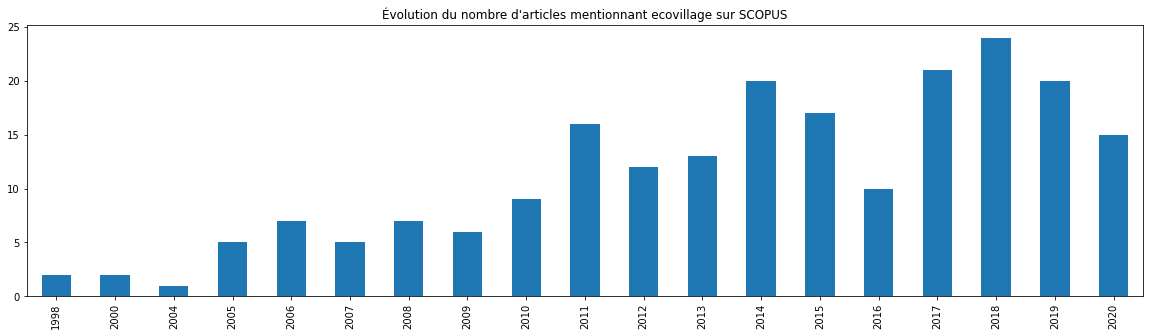

In [67]:
data["Year"].value_counts().sort_index().plot(kind="bar",figsize=(20,5))
plt.title("Évolution du nombre d'articles mentionnant ecovillage sur SCOPUS")

Rajouter une colonne avec les mots-clés à la fois auteurs et automatiques

In [72]:
def reco(x):
    kw = []
    if pd.notnull(x['Author Keywords']):
        kw+=x['Author Keywords'].lower().split(";")
    if pd.notnull(x['Index Keywords']):
        kw+=x['Index Keywords'].lower().split(";")
    return [i.strip() for i in kw]
        

data["kw"] = data.apply(reco,axis=1)

Produire un tableau des mots-clés avec leur fréquence

In [21]:
#t = [i.split(";") for i in list(data['Author Keywords'].str.lower()) if pd.notnull(i)] + [i.split(";") for i in list(data['Index Keywords'].str.lower()) if pd.notnull(i)]
t = list(data["kw"])
t = [j.strip() for i in t for j in i]
t = pd.Series(t).value_counts()
t

sustainable development    70
eco-village                65
sustainability             39
rural areas                34
urban planning             28
                           ..
machinery                   1
infrastructure              1
trans-development           1
rural tourisms              1
intelligent buildings       1
Length: 1730, dtype: int64

Produire un fichier des mots clés pour le recodage

In [23]:
t = pd.DataFrame(t,columns=["nombre"])
t["catégorie"] = None
t.to_excel("liste_mots_cles_a_recoder.xls")

Charger les mots-clés recodés

In [83]:
reco = pd.read_excel("./liste_mots_cles_a_recoder-recodes.xls")
reco.columns = ["kw","count","cat","","",""]
reco.head()

,kw,count,cat,,,
0,sustainable development,70,NaN,NaN,NaN,NaN
1,eco-village,65,NaN,NaN,Governance/ actors,1.0
2,sustainability,39,NaN,NaN,Citizen,2.0
3,rural areas,34,NaN,NaN,Eco-gestures,3.0
4,urban planning,28,NaN,NaN,NaN,NaN


Création d'un dictionnaire mot-clé:catégorie

In [84]:
dictionnaire = dict(reco.set_index("kw")["cat"].dropna())
dictionnaire

{'ecotourism': 3.0,
 'energy utilization': 3.0,
 'cohousing': 2.0,
 'recycling': 3.0,
 'governance approach': 1.0,
 'organic agriculture': 3.0,
 'energy use': 3.0,
 'social housing': 2.0,
 'sustainable communities': 2.0,
 'community': 2.0,
 'circular economy': 3.0,
 'practices': 3.0,
 'sustainable community': 2.0,
 'permaculture': 3.0,
 'horticulture': 3.0,
 'rural population': 2.0,
 'communities': 2.0,
 'sustainable consumption': 3.0,
 'local economy': 3.0,
 'citizens workshop': 1.0,
 'party politics': 1.0,
 'social diversity': 2.0,
 'social movement': 1.0,
 'information management': 1.0,
 'intentional communities': 2.0,
 'local community': 2.0,
 'public participant': 1.0,
 'gentrification': 2.0,
 'local government': 1.0,
 'european union': 1.0,
 'environmental governance': 1.0,
 'alternative tourism': 3.0,
 'public-private partnership': 1.0,
 'eco-community': 2.0,
 'social inequalities': 2.0,
 'eco-tourism': 3.0,
 'education': 1.0,
 'civil society': 1.0,
 'eco-communities': 2.0,
 'pa

recodage des articles

In [73]:
#création d'une fonction de recodage qui donne les catégories associées à chaque article

def recodage(x,dic):
    article = []
    for i in dic:
        if i in x:
            article.append(dic[i])
    article = list(set(article))
    if len(article)==0:
        return None
    return article

data["codage"] = data["kw"].apply(lambda x : recodage(x,dictionnaire))

Distribution des catégories

In [74]:
data["codage"].apply(str).value_counts()

None               142
[3.0]               28
[1.0]               15
[2.0]               13
[1.0, 3.0]           5
[2.0, 3.0]           5
[1.0, 2.0]           3
[1.0, 2.0, 3.0]      1
Name: codage, dtype: int64

Sous-corpus

In [75]:
data[pd.notnull(data["codage"])]

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID,kw,codage
0,"Schianetz K., Kavanagh L.",18438209700;18437274800;,Sustainability indicators for tourism destinat...,2008,Journal of Sustainable Tourism,16,6,NaN,601,628,...,NaN,English,J. Sustainable Tour.,Article,Final,NaN,Scopus,2-s2.0-57349130590,"[adaptive management, complex adaptive systems...",[3.0]
1,Lietaert M.,29068041900;,Cohousing's relevance to degrowth theories,2010,Journal of Cleaner Production,18,6,NaN,576,580,...,NaN,English,J. Clean. Prod.,Article,Final,NaN,Scopus,2-s2.0-77649270877,"[cohousing, degrowth, ecovillage, intentional ...","[1.0, 2.0]"
3,Lee T.-H.,26654145900;,A structural model for examining how destinati...,2009,Journal of Sustainable Tourism,17,6,NaN,727,745,...,NaN,English,J. Sustainable Tour.,Article,Final,NaN,Scopus,2-s2.0-70449435244,"[community-based tourism, destination image, f...","[1.0, 3.0]"
5,"Meijering L., Huigen P., Van Hoven B.",6507077322;6602697026;6507366850;,Intentional communities in rural spaces,2007,Tijdschrift voor Economische en Sociale Geografie,98,1,NaN,42,52,...,NaN,English,Tijdschr. Econ. Soc. Geogr.,Article,Final,NaN,Scopus,2-s2.0-33846651341,"[intentional communities, rural space, survey ...",[2.0]
8,Bossy S.,56318695300;,The utopias of political consumerism: The sear...,2014,Journal of Consumer Culture,14,2,NaN,179,198,...,NaN,English,J. Consum. Cult.,Article,Final,NaN,Scopus,2-s2.0-84905867260,"[discourse, political consumerism, practices, ...",[3.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,"Liang W.-Y., Genovese P.V.",56295633000;41761368500;,RETRACTED ARTICLE: The design method of ecovil...,2011,2011 International Conference on Electric Tech...,NaN,NaN,5776279,3631,3634,...,NaN,Chinese,"Int. Conf. Electr. Technol. Civ. Eng., ICETCE ...",Conference Paper,Final,NaN,Scopus,2-s2.0-79959649314,"[design idea, ecologism, ecovillage, sustainab...",[2.0]
197,"Duan N., Lin C., Liu X.D., Wang Y., Zhang X.J....",36105765000;36834035300;57206737951;5665667000...,Study on the effect of biogas project on the d...,2010,Modelling for Environment's Sake: Proceedings ...,3,NaN,NaN,2619,2626,...,NaN,English,Model. Environ. Sake: Proc. Bienn. Conf. Int. ...,Conference Paper,Final,NaN,Scopus,2-s2.0-84863349143,"[beilangzhong, biogas, eco-village, low-carbon...",[3.0]
206,"Kawagishi U., Kitano K., Sugimoto H., Sawada Y...",36091270000;36128526100;36129105900;3711311640...,Study on the living space planning viewing fro...,2007,AIJ Journal of Technology and Design,13,26,NaN,815,820,...,NaN,English,AIJ J. Technol. Des.,Article,Final,Open Access,Scopus,2-s2.0-79954459806,"[cohousing, community, ecovillage, environment...",[2.0]
209,Fry C.,7102479772;,Design for living [BedZED architectural project],2006,Engineering and Technology,1,5,NaN,26,30,...,NaN,English,Eng. Technol.,Article,Final,NaN,Scopus,2-s2.0-33748667514,"[energy conservation, environmental factors, p...",[3.0]


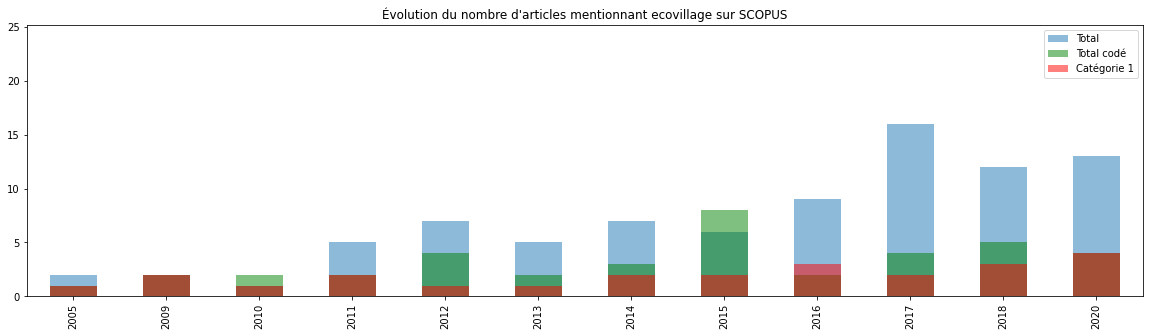

In [108]:
#Fonction pour voir la catégorie
def is_in(x,n):
    if x==None:
        return False
    if n in x:
        return True
    return False

#Afficher
ax = data["Year"].value_counts().sort_index().plot(kind="bar",figsize=(20,5),alpha=0.5)
data[pd.notnull(data["codage"])]["Year"].value_counts().sort_index().plot(kind="bar",ax=ax,color="green",alpha=0.5)
data[data["codage"].apply(lambda x : is_in(x,1.0))]["Year"].value_counts().sort_index().plot(kind="bar",ax=ax,color="red",alpha=0.5)



plt.title("Évolution du nombre d'articles mentionnant ecovillage sur SCOPUS")
plt.legend(["Total","Total codé","Catégorie 1"])

